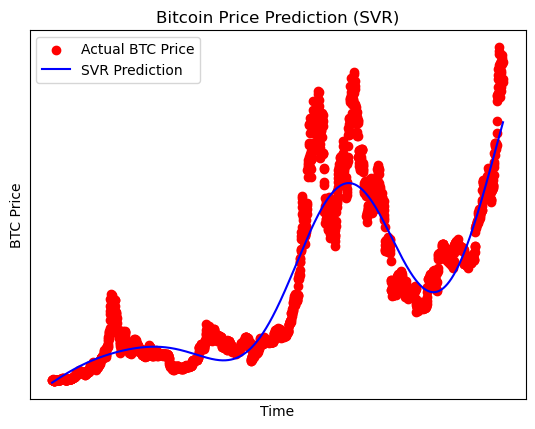

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load the dataset
dataset = pd.read_csv('linear_interpolation_comp.csv')

# Drop unnecessary columns
dataset = dataset.drop(columns=['market_cap', 'total_volume'])

# Convert 'snapped_at' column to datetime and normalize it
dataset['snapped_at'] = pd.to_datetime(dataset['snapped_at'])
dataset['snapped_at'] = (dataset['snapped_at'] - dataset['snapped_at'].min()) / np.timedelta64(1, 'D')

# Separate independent and dependent variables
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Train SVR model
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled.ravel())



# Visualize the SVR model
plt.scatter(X_scaled, y_scaled, color='red', label='Actual BTC Price')
plt.plot(X_scaled, regressor.predict(X_scaled), color='blue', label='SVR Prediction')

plt.title('Bitcoin Price Prediction (SVR)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()



In [2]:
from sklearn.metrics import r2_score
y_pred_scaled = regressor.predict(X_scaled)
# Inverse transform predicted values to original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Reshape y to ensure it's a 1D array
y = y.reshape(-1, 1)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("R-squared:", r_squared)

R-squared: 0.8635603017442164


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


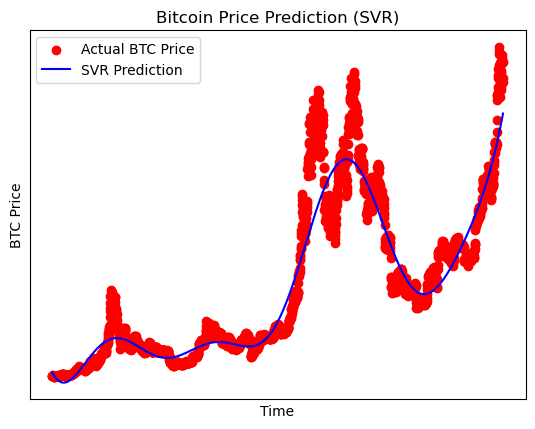

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Load the dataset
dataset = pd.read_csv('linear_interpolation_comp.csv')

# Drop unnecessary columns
dataset = dataset.drop(columns=['market_cap', 'total_volume'])

# Convert 'snapped_at' column to datetime and normalize it
dataset['snapped_at'] = pd.to_datetime(dataset['snapped_at'])
dataset['snapped_at'] = (dataset['snapped_at'] - dataset['snapped_at'].min()) / np.timedelta64(1, 'D')

# Separate independent and dependent variables
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Define the SVR model
regressor = SVR()

# Define the hyperparameters grid to search over
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_scaled, y_scaled.ravel())

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_regressor = grid_search.best_estimator_

# Visualize the SVR model
plt.scatter(X_scaled, y_scaled, color='red', label='Actual BTC Price')
plt.plot(X_scaled, best_regressor.predict(X_scaled), color='blue', label='SVR Prediction')

plt.title('Bitcoin Price Prediction (SVR)')
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()


In [4]:
from sklearn.metrics import r2_score

# Use the best regressor obtained from grid search
best_regressor.fit(X_scaled, y_scaled.ravel())

# Predict using the best regressor
y_pred_scaled = best_regressor.predict(X_scaled)

# Inverse transform predicted values to original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Reshape y to ensure it's a 1D array
y = y.reshape(-1, 1)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("R-squared:", r_squared)


R-squared: 0.8991945438153814


R-squared for Training set: 0.8581466158875367
R-squared for Validation set: 0.8567897589810824
R-squared for Test set: 0.8661573904906353
R-squared for overall prediction: 0.8591110999036108


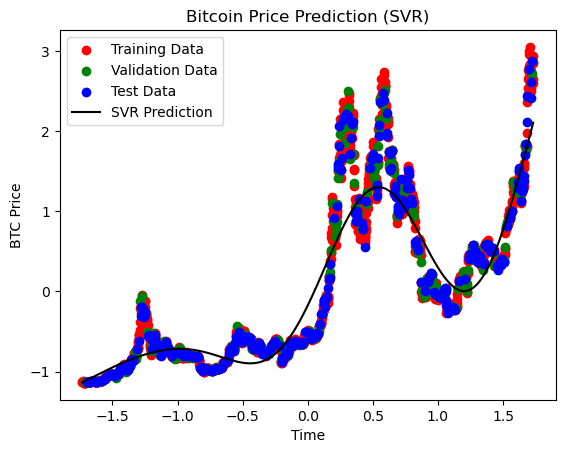

In [3]:
# Train Test Split Validation of Comprehensive model NOT TUNED
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('linear_interpolation_comp.csv')

# Drop unnecessary columns
dataset = dataset.drop(columns=['market_cap', 'total_volume'])

# Convert 'snapped_at' column to datetime and normalize it
dataset['snapped_at'] = pd.to_datetime(dataset['snapped_at'])
dataset['snapped_at'] = (dataset['snapped_at'] - dataset['snapped_at'].min()) / np.timedelta64(1, 'D')

# Separate independent and dependent variables
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into the Training set, Validation set, and Test set
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train SVR model
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

# Calculate R-squared for each set
r2_train = regressor.score(X_train, y_train)
r2_val = regressor.score(X_val, y_val)
r2_test = regressor.score(X_test, y_test)

# Make overall prediction
y_pred_scaled = regressor.predict(X_scaled)
r2_pred = r2_score(y_scaled, y_pred_scaled)

print("R-squared for Training set:", r2_train)
print("R-squared for Validation set:", r2_val)
print("R-squared for Test set:", r2_test)
print("R-squared for overall prediction:", r2_pred)

# Visualize the SVR model
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_val, y_val, color='green', label='Validation Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_scaled, y_pred_scaled, color='black', label='SVR Prediction')

plt.title('Bitcoin Price Prediction (SVR)')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()



R-squared for Training set: 0.8915043476877869
R-squared for Validation set: 0.8982698715631829
R-squared for Test set: 0.8996524628463218
R-squared for overall prediction: 0.8937122671572463


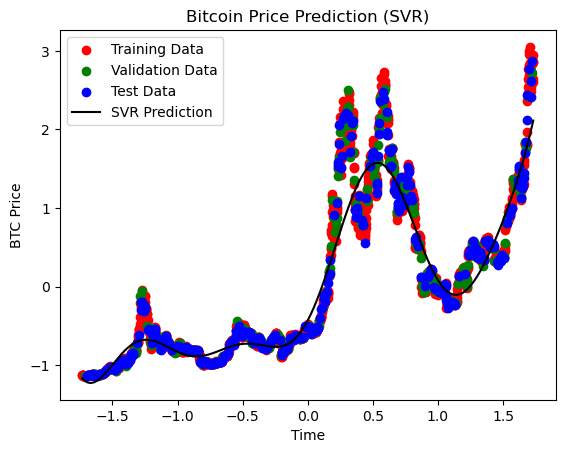

In [1]:
# TUNED Comprehensive model with Train test split validation 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('linear_interpolation_comp.csv')

# Drop unnecessary columns
dataset = dataset.drop(columns=['market_cap', 'total_volume'])

# Convert 'snapped_at' column to datetime and normalize it
dataset['snapped_at'] = pd.to_datetime(dataset['snapped_at'])
dataset['snapped_at'] = (dataset['snapped_at'] - dataset['snapped_at'].min()) / np.timedelta64(1, 'D')

# Separate independent and dependent variables
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into the Training set, Validation set, and Test set
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train SVR model with specified parameters
regressor = SVR(C=100, kernel='rbf', gamma='scale')
regressor.fit(X_train, y_train.ravel())

# Calculate R-squared for each set
r2_train = regressor.score(X_train, y_train)
r2_val = regressor.score(X_val, y_val)
r2_test = regressor.score(X_test, y_test)

# Make overall prediction
y_pred_scaled = regressor.predict(X_scaled)
r2_pred = r2_score(y_scaled, y_pred_scaled)

print("R-squared for Training set:", r2_train)
print("R-squared for Validation set:", r2_val)
print("R-squared for Test set:", r2_test)
print("R-squared for overall prediction:", r2_pred)

# Visualize the SVR model
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_val, y_val, color='green', label='Validation Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_scaled, y_pred_scaled, color='black', label='SVR Prediction')

plt.title('Bitcoin Price Prediction (SVR)')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()
